# 汽车目标用户预测

该数据集包含了社交网络中用户的信息。这些信息涉及用户ID,性别,年龄以及预估薪资。一家汽车公司刚刚推出了他们新型的豪华SUV，我们尝试预测哪些用户会购买这种全新SUV。并且在最后一列用来表示用户是否购买。我们将建立一种模型来预测用户是否购买这种SUV，该模型基于两个变量，分别是年龄和预计薪资。因此我们的特征矩阵将是这两列。我们尝试寻找用户年龄与预估薪资之间的某种相关性，以及他是否购买SUV的决定。

# 导入需要用到的python库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 导入数据集

In [2]:
dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
dataset.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [22]:
dataset.iloc[:, [2, 3]].columns

Index(['Age', 'EstimatedSalary'], dtype='object')

# 将数据集拆分为训练集和测试集

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# 对测试集进行决策树分类拟合

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)
classifier.fit(X_train, y_train)

### 预测测试集的结果
y_pred = classifier.predict(X_test)


# 制作混淆矩阵

In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm


array([[64,  4],
       [ 2, 30]])

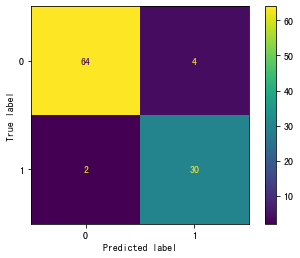

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=classifier.classes_)
disp.plot()

# 将训练集结果进行可视化

[Text(167.4, 190.26, 'X[0] <= 44.5\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(83.7, 135.9, 'X[1] <= 90500.0\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 36.5\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 133500.0\nentropy = 0.619\nsamples = 39\nvalue = [6, 33]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.779\nsamples = 26\nvalue = [6, 20]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 41500.0\nentropy = 0.645\nsamples = 85\nvalue = [14, 71]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 22500.0\nentropy = 0.211\nsamples = 30\nvalue = [1, 29]'),
 Text(188.32500000000002, 27.180000000000007, 'entro

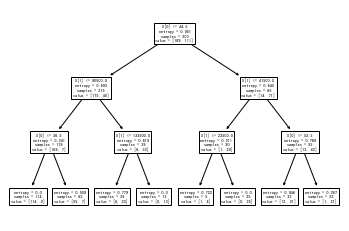

In [17]:
from sklearn import tree
tree.plot_tree(classifier)

In [27]:
# 使用graphviz导出决策树结果，可以是pdf/svg等格式，需要先在电脑上安装graphviz程序，然后再在python 中pip graphviz
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=dataset.iloc[:, [2, 3]].columns,  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH